In [1]:
import glob
import os

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.use('Agg') 

%matplotlib inline

/Users/janet/miniconda3/envs/m4_janalysis/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [5]:
! ls ../unused_reads/unmapped-final/results_summary/downsample_1000/

112_LOW13_1000.tsv 70_HOW9_1000.tsv   82_HOW10_1000.tsv


In [6]:
results = glob.glob('../unused_reads/unmapped-final/results_summary/downsample_1000/*.tsv')

In [7]:
results

['../unused_reads/unmapped-final/results_summary/downsample_1000/82_HOW10_1000.tsv',
 '../unused_reads/unmapped-final/results_summary/downsample_1000/112_LOW13_1000.tsv',
 '../unused_reads/unmapped-final/results_summary/downsample_1000/70_HOW9_1000.tsv']

In [8]:
results_dict = {}
for unmapped_result in results:
    print(os.path.basename(unmapped_result))
    sample_name = os.path.basename(unmapped_result).rstrip('.tsv')
    results_dict[sample_name] = pd.read_csv(unmapped_result, sep = '\t', names=['reference', 'BLAST hits'])
    

82_HOW10_1000.tsv
112_LOW13_1000.tsv
70_HOW9_1000.tsv


In [9]:
forbidden_terms = ['ribosom', 'RNA', 'ynthetic']

In [10]:
results_without_strings = {}

for result_name, result_df in results_dict.items():
    print(result_name)
    print('num rows before removal: {}'.format(result_df.shape))
    
    # remove rows that have "ribosom", and "RNA"
    for f_term in forbidden_terms:
        # df.C.str.contains("XYZ") == False]
        result_df = result_df[result_df['reference'].str.contains(f_term) == False]
    print('num rows after removal: {}'.format(result_df.shape))
    
    # append a column on that is the fraction of all BLAST hits. 
    hit_total = result_df['BLAST hits'].sum()
    print('{} BLAST hits for {}'.format(hit_total, result_name))
    result_df['BLAST hit fraction'] = result_df['BLAST hits']*1.0/hit_total
    
    print(result_df.head(2))
    
    results_dict[result_name] = result_df
    print('==================')
        
    

112_LOW13_1000
num rows before removal: (596, 2)
num rows after removal: (356, 2)
8744 BLAST hits for 112_LOW13_1000
                                           reference  BLAST hits  \
0  Cyprinus carpio genome assembly common carp ge...        3213   
2  Bacillus subtilis subsp. subtilis strain CU105...        2371   

   BLAST hit fraction  
0            0.367452  
2            0.271157  
70_HOW9_1000
num rows before removal: (1063, 2)
num rows after removal: (445, 2)
1611 BLAST hits for 70_HOW9_1000
                                            reference  BLAST hits  \
15            Methylophilus sp. TWE2, complete genome         221   
25  Cyprinus carpio genome assembly common carp ge...         103   

    BLAST hit fraction  
15            0.137182  
25            0.063935  
82_HOW10_1000
num rows before removal: (686, 2)
num rows after removal: (397, 2)
5858 BLAST hits for 82_HOW10_1000
                                           reference  BLAST hits  \
0  Bacillus subtilis subsp

In [11]:
for df in results_dict.values():
    print(df.shape)

(356, 3)
(445, 3)
(397, 3)


In [12]:
plot_dir = './plots/160601_unused_read_histograms/'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

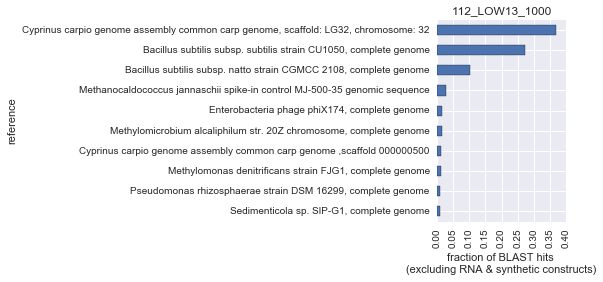

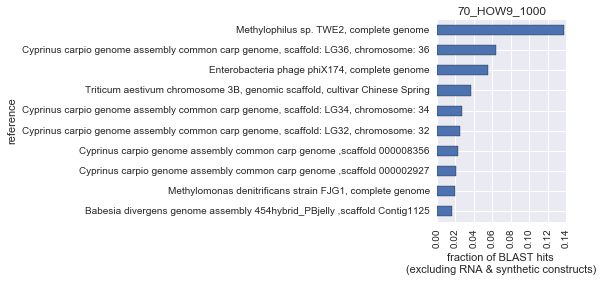

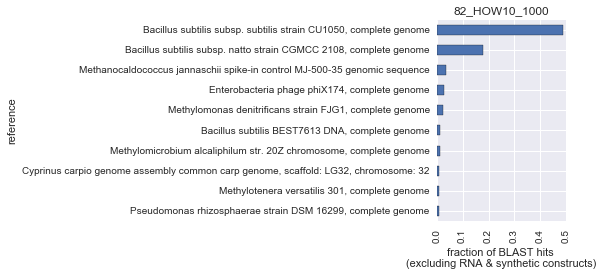

In [13]:
for sample_name, result_df in results_dict.items():
    fig, ax = plt.subplots()
    result_df.head(10).plot.barh(x='reference', y='BLAST hit fraction', 
                                 stacked=True, ax=ax, legend=False,
                                 title = sample_name,
                                 figsize=(9,4))
    #ax.set_yticklabels(['A', 'B', 'C', 'D', 'E', 'F'])
    ax.invert_yaxis()  # put big bars on top
    ax.set_xlabel("fraction of BLAST hits \n(excluding RNA & synthetic constructs)")
    plt.gcf().subplots_adjust(left=0.7)
    plt.gcf().subplots_adjust(bottom=0.2)
    plt.xticks(rotation=90)
    #fig.tight_layout()
    fig.savefig(plot_dir + '160601_{}_unmapped_reads.pdf'.format(sample_name))
    fig.savefig(plot_dir + '160601_{}_unmapped_reads.svg'.format(sample_name))
    